# Progressive Growing GAN - Flickr-FacesHQ

## Brief

This Notebook does an Exploratory Data Analysis for the Dataset.

## Libraries

In [59]:
import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt

## Data

### Load - Locally

In [12]:
# Variables
data_folder = "thumbnails128x128"
image_height = 128
image_width = 128
batch_size = 64

# All 70k images used for training.
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_folder,
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 8073 files belonging to 1 classes.


### Visualize 

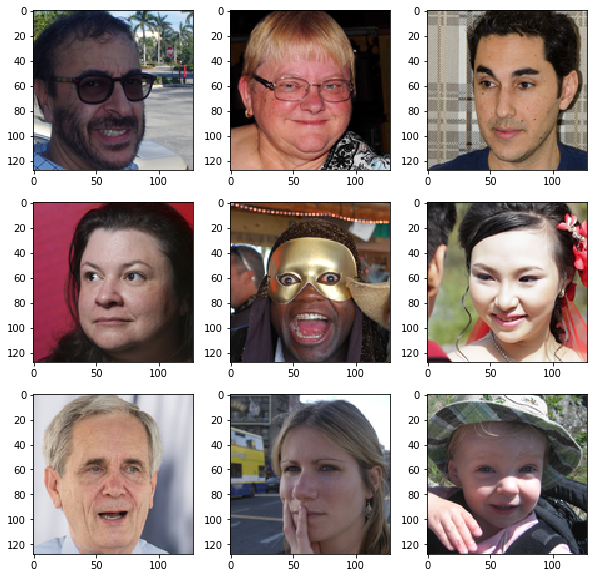

In [133]:
plt.figure(figsize=(10, 10))
for images,labels  in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))


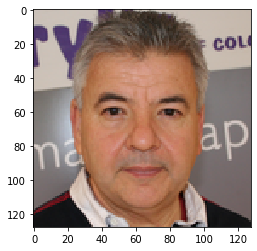

In [115]:
plt.imshow(images[0].numpy().astype("uint8"))

In [116]:
array = tf.keras.preprocessing.image.img_to_array(images[0])
np.shape(array)


(128, 128, 3)

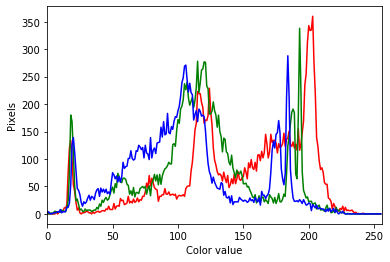

In [117]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        array[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

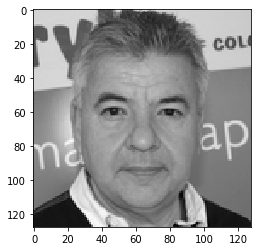

In [118]:
rgb_weights = [1/3, 1/3, 1/3]
grayscale_image = np.dot(array, rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

Text(0, 0.5, 'Pixels')

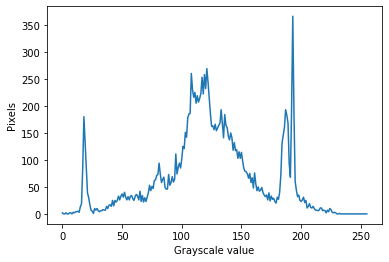

In [119]:
histogram, bin_edges = np.histogram(grayscale_image[:, :], bins=256, range=(0, 256))
plt.plot(bin_edges[0:-1], histogram)
plt.xlabel("Grayscale value")
plt.ylabel("Pixels")

Text(0, 0.5, 'Pixels')

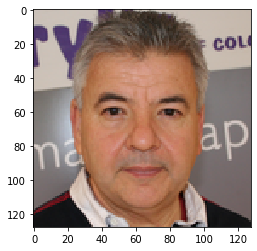

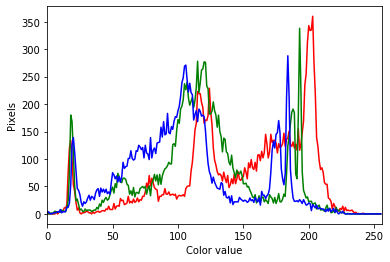

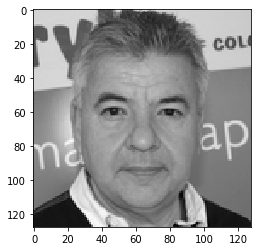

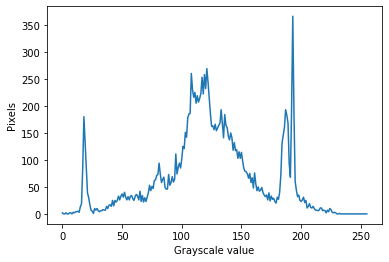

In [132]:

f1 = plt.figure(1)
plt.imshow(images[0].numpy().astype("uint8"))


f2 = plt.figure(2)
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        array[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

f3 = plt.figure(3)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))


f4 = plt.figure(4)
histogram, bin_edges = np.histogram(grayscale_image[:, :], bins=256, range=(0, 256))
plt.plot(bin_edges[0:-1], histogram)
plt.xlabel("Grayscale value")
plt.ylabel("Pixels")
